In [1]:
from ohsome import OhsomeClient

import altair as alt
import altair_tiles as til

import geopandas as gpd
import pandas as pd


import folium

import branca.colormap as cm
import numpy as np

import matplotlib.pyplot as plt


In [2]:
#This Script gets a geometry from osm via overpass and gets a osm streetnetwork incl history for this geometry.

# get rasters (w net and acc info)

In [3]:
#gdf_polygons_filtered_germany = gpd.read_file(r"output\gdf_polygons_filtered_germany.gpkg")
germany_raster2022_net_acc = gpd.read_file("output/germany_raster2022_net_acc.gpkg")

In [4]:
germany_raster2022_net_acc

,id_left,2018_length_50,2024_length_50,2018_length_30,2024_length_30,2018_total_length,2018_ratio,2024_total_length,2024_ratio,diff_total_length,...,2018_count,2019_count,2020_count,2021_count,2022_count,2023_count,vorher,nachher,unfall_ratio,geometry
0,1kmN2920E4186,0.000000,328.788848,333.719777,3.172751,333.719777,1.000000,331.961600,0.009558,-1.758177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((8.1411 49.37758, 8.15486 49.37..."
1,1kmN3376E4317,0.000000,405.627253,429.872263,21.858073,429.872263,1.000000,427.485327,0.051132,-2.386937,...,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,-1.0,"MULTIPOLYGON (((9.93974 53.49176, 9.95481 53.4..."
2,1kmN3269E4561,0.000000,345.792993,372.438696,24.254439,372.438696,1.000000,370.047431,0.065544,-2.391265,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,"MULTIPOLYGON (((13.53385 52.47785, 13.54855 52..."
3,1kmN2868E4278,52.623281,770.512547,734.514330,12.275386,787.137611,0.933146,782.787934,0.015682,-4.349677,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,"MULTIPOLYGON (((9.41341 48.92369, 9.42705 48.9..."
4,1kmN2795E4339,47.286727,974.807076,972.420970,44.923880,1019.707697,0.953627,1019.730956,0.044055,0.023259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((10.24235 48.26825, 10.25582 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394,1kmN2732E4156,465.539668,0.000000,0.000000,510.533903,465.539668,0.000000,510.533903,1.000000,44.994236,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,"MULTIPOLYGON (((7.80354 47.67957, 7.81685 47.6..."
7395,1kmN3006E4203,35.760527,0.000000,0.000000,35.760527,35.760527,0.000000,35.760527,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((8.34886 50.1543, 8.36285 50.15..."
7396,1kmN2763E4171,273.755348,0.000000,0.000000,278.852819,273.755348,0.000000,278.852819,1.000000,5.097470,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,"MULTIPOLYGON (((7.99223 47.96225, 8.00561 47.9..."
7397,1kmN2831E4201,144.273724,0.000000,0.000000,140.604107,144.273724,0.000000,140.604107,1.000000,-3.669616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((8.37411 48.5805, 8.38765 48.58..."


In [5]:

# doing some data cleaning, 

first_year = "2018"
last_year = "2024"

# List of columns to round to the nearest integer
columns_to_round = [
    f"{first_year}_length_50", f"{last_year}_length_50", f"{first_year}_length_30", f"{last_year}_length_30",
    f"{first_year}_total_length", f"{last_year}_total_length", "diff_total_length"
]

# List of columns to round to two decimal places
columns_to_round_2 = [
    f"{first_year}_ratio", f"{last_year}_ratio",
    "diff_total_length_rel", "diff_ratio_tempo30"
]

# Round the specified columns to the nearest integer and convert to integer type
germany_raster2022_net_acc[columns_to_round] = germany_raster2022_net_acc[columns_to_round].round(0).astype(int)

# Round the specified columns to two decimal places
germany_raster2022_net_acc[columns_to_round_2] = germany_raster2022_net_acc[columns_to_round_2].round(2)


# Define the new column order
new_column_order = [
    "id_left",
    f"{first_year}_length_30", f"{first_year}_length_50", f"{first_year}_total_length", f"{first_year}_ratio",
    f"{last_year}_length_30", f"{last_year}_length_50", f"{last_year}_total_length", f"{last_year}_ratio",
    "diff_total_length", "diff_total_length_rel", "diff_ratio_tempo30"
]

# Reorder the columns while keeping the rest unchanged
remaining_columns = [col for col in germany_raster2022_net_acc.columns if col not in new_column_order]
final_column_order = new_column_order + remaining_columns

# Reorder DataFrame
germany_raster2022_net_acc = germany_raster2022_net_acc[final_column_order]

gdf_rasters=germany_raster2022_net_acc.to_crs(epsg=3857).copy()


In [6]:
#gdf_polygons_filtered_germany.explore(column="diff_ratio_tempo30", tiles="CartoDB positron", cmap="coolwarm_r") # seismic_r

In [7]:
# view the changes "diff_ratio_tempo30" on a interactive map
#gdf_polygons_filtered_germany[gdf_polygons_filtered_germany["2024_total_length"]>3000].sort_values("diff_ratio_tempo30").explore(column="diff_ratio_tempo30", tiles="CartoDB positron", cmap="coolwarm_r") # seismic_r

#### Prep the Folium View
* To be able to view both the network changes and the accident changes in one Folium map, I cut out a circle with a radius of 400m.
* The color of the raster shows the network changes.
* The color of the circle shows the accident changes.

In [8]:

# this will take pretty long ~ 7mins 


# Step 1: Compute the centroids of the polygons
gdf_centroids = gdf_rasters.copy()
gdf_centroids["geometry"] = gdf_rasters.geometry.centroid

# Step 2: Buffer the centroids by 400 meters
gdf_buffered_centroids = gdf_centroids.copy()
gdf_buffered_centroids["geometry"] = gdf_centroids.geometry.buffer(400)

# Step 3: Clip the original polygons by removing the buffered areas
gdf_cut = gdf_rasters.copy()
gdf_cut["geometry"] = gdf_rasters.geometry.difference(gdf_buffered_centroids.union_all())




In [9]:
### to leave out MV, NRW and TH
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland_in=bland[~bland["id"].isin(["DE-MV","DE-NW","DE-TH"])]
bland_out=bland[bland["id"].isin(["DE-MV","DE-NW","DE-TH"])]


In [10]:

#count_columns = germany_raster2022_net_acc.filter(like="_count").columns.tolist()
#count_columns

In [ ]:


# Ensure both GeoDataFrames are in WGS84 (EPSG:4326) for Folium
gdf_buffered_centroids = gdf_buffered_centroids.to_crs(epsg=4326)
gdf_cut = gdf_cut.to_crs(epsg=4326)

# Fix: Replace NaN values to avoid colormap errors
gdf_buffered_centroids["unfall_ratio"] = gdf_buffered_centroids["unfall_ratio"].fillna(0)
gdf_cut["diff_ratio_tempo30"] = gdf_cut["diff_ratio_tempo30"].fillna(0)

min_length = 1000
min_accidents = 3

gdf_buffered_centroids=gdf_buffered_centroids[gdf_buffered_centroids[f"{last_year}_total_length"]>min_length].copy()
gdf_buffered_centroids=gdf_buffered_centroids[gdf_buffered_centroids["vorher"]>=min_accidents].copy()
gdf_cut=gdf_cut[gdf_cut[f"{last_year}_total_length"]>=min_length].copy()
gdf_cut=gdf_cut[gdf_cut["vorher"]>=min_accidents].copy()

# round the values
gdf_cut = gdf_cut.round(2)
gdf_buffered_centroids = gdf_buffered_centroids.round(2)


tooltip_fields = [
    'id_left', f'{str(first_year)}_length_30', f'{str(first_year)}_length_50', f'{str(first_year)}_total_length', f'{str(first_year)}_ratio', 
    f'{str(last_year)}_length_30', f'{str(last_year)}_length_50', f'{str(last_year)}_total_length', f'{str(last_year)}_ratio', 
    'diff_total_length', 'diff_total_length_rel', "diff_ratio_tempo30", 
    '2017_count', '2018_count', '2019_count', '2020_count', '2021_count', '2022_count', '2023_count', 
    'vorher', 'nachher', 'unfall_ratio'
]

# Create alias labels for tooltips (optional, for better readability)
tooltip_aliases = [
    "Kachel-ID", f"{first_year} Length 30", f"{first_year} Length 50", f"{first_year} Total Length", f"{first_year} Ratio", 
    f"{last_year} Length 30", f"{last_year} Length 50", f"{last_year} Total Length", f"{last_year} Ratio", 
    "Diff Total Length", "Diff Total Length Rel", "Diff Ratio Tempo30", 
    "2017 Unfall-Count", "2018 Unfall-Count", "2019 Unfall-Count", "2020 Unfall-Count", "2021 Unfall-Count", "2022 Unfall-Count", "2023 Unfall-Count", 
    "Acc Before", "Acc After", "Accident Ratio"
]

# Get max absolute values for centered colormaps
max_unfall = max(abs(gdf_buffered_centroids["unfall_ratio"].min()), abs(gdf_buffered_centroids["unfall_ratio"].max()))
max_diff_tempo30 = max(abs(gdf_cut["diff_ratio_tempo30"].min()), abs(gdf_cut["diff_ratio_tempo30"].max()))


## add the attributions
basic_attribution='\u0026copy; \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors'
carto_attribution=basic_attribution + ' | \u0026copy; \u003ca href=\"http://cartodb.com/attributions\"\u003eCartoDB\u003c/a\u003e' # <-- note this

attr_1= ' | \u003ca href=\"https://unfallatlas.statistikportal.de/"\u003e Unfallatlas \u003c/a\u003e der Statistischen Ämter des Bundes und der Länder '
attr_2= ' | \u003ca href=\"https://plattform-npgeo-vfdb.hub.arcgis.com/datasets/esri-de-content::zensus-2022-gitterzellen/about?layer=1"\u003e Zensus2022_1kmGitter \u003c/a\u003e  © GeoBasis-DE / BKG (2024) '
btr_attr=' | Erstellt von TH Wildau \u003ca href=\"https://www.th-wildau.de/studieren-weiterbilden/studiengaenge/radverkehr-m-eng/labor-radverkehr"\u003e FG Radverkehr \u003c/a\u003e'

btr_attr=attr_1 + attr_2 + btr_attr



# Create a base map with CartoDB Positron tiles
m = folium.Map(
location=[gdf_buffered_centroids.geometry.to_crs(epsg=3857).centroid.to_crs(epsg=4326).y.mean(), 
          gdf_buffered_centroids.geometry.to_crs(epsg=3857).centroid.to_crs(epsg=4326).x.mean()], 
    zoom_start=9, 
    control_scale=True,
    tiles="CartoDB Positron",
    attr=carto_attribution + btr_attr
)


# Add bland_in as white transparent background FIRST
folium.GeoJson(
    bland_in,
    name="Bland In",
    style_function=lambda feature: {
        'fillColor': 'white',
        'color': 'white',  # White edges
        'weight': 0.5,
        'fillOpacity': 0.3  # Adjust transparency
    },
    control=False  # No need for Layer Control
).add_to(m)

# Add bland_out as gray transparent background SECOND
folium.GeoJson(
    bland_out,
    name="Bland Out",
    style_function=lambda feature: {
        'fillColor': 'gray',
        'color': 'gray',  # Gray edges
        'weight': 0.5,
        'fillOpacity': 0.3  # Adjust transparency
    },
    control=False  # No need for Layer Control
).add_to(m)



### 1. Add gdf_buffered_centroids layer with unfall_ratio coloring ###
buffer_colormap = cm.LinearColormap(['green','green','yellow', 'red', 'red'], 
                                    vmin=-1, vmax=1, 
                                    #caption="● Entwicklung Anzahl Unfälle (18&19 vs 22&23)")
                                   caption="⬤ Entwicklung Anzahl Unfälle (18&19 vs 22&23)")
def style_buffered(feature):
    return {
        'fillColor': buffer_colormap(feature['properties']['unfall_ratio']),
        'color': 'lightgray',  # Light gray edges
        'weight': 0,
        'fillOpacity': 0.7
    }

folium.GeoJson(
    gdf_buffered_centroids,
    name="Unfäll",
    style_function=style_buffered,
    #tooltip=folium.GeoJsonTooltip(fields=["unfall_ratio"], aliases=["Unfall Ratio:"])
    tooltip=folium.GeoJsonTooltip(fields=tooltip_fields, aliases=tooltip_aliases)
).add_to(m)

buffer_colormap.add_to(m)  # Add legend


### 2. Add gdf_cut layer with diff_ratio_tempo30 coloring ###
cut_colormap = cm.LinearColormap(['red', 'red', 'lightgray', 'blue', 'blue'], 
                                 vmin=-max_diff_tempo30, vmax=max_diff_tempo30, 
                                 #caption="◘ Änderung des Tempo30 ggü Tempo50 Anteils")
                                 caption="🞑 Änderung des Tempo30 ggü Tempo50 Anteils")
def style_cut(feature):
    return {
        'fillColor': cut_colormap(feature['properties']['diff_ratio_tempo30']),
        'color': 'lightgray',  # Light gray edges
        'weight': 0,
        'fillOpacity': 0.6
    }

folium.GeoJson(
    gdf_cut,
    name="Tempo",
    style_function=style_cut,
    #tooltip=folium.GeoJsonTooltip(fields=["diff_ratio_tempo30"], aliases=["Diff Ratio Tempo30:"])
    tooltip=folium.GeoJsonTooltip(fields=tooltip_fields, aliases=tooltip_aliases)
).add_to(m)

cut_colormap.add_to(m)  # Add legend

# Add Layer Control
folium.LayerControl().add_to(m)

# Save map to HTML file or display

m.save("output/germany_raster2022_net_acc.html")
#m  # Display in Jupyter Notebook (if applicable)


## Choosing the Kachel

In [59]:
#pd.set_option("display.max_columns", None)  # Show all columns
#gdf_rasters[gdf_rasters["unfall_ratio"]<-0.5].sort_values("diff_ratio_tempo30")[:5]

In [ ]:

### Neue 2022er Kacheln
#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2865E4224"] # Pforzheim

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2876E4480"] # ??

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3269E4554"] # Berlin-Neukölln
#berlin="yes" # this is just a flag coz berlin dosnt hav data in 2017

#gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN2988E4197"] # Mainz

gdf_osm_shape_poly=gdf_rasters[gdf_rasters.id_left=="1kmN3002E4223"] # Frankfurt


berlin="no" # this is just a flag coz berlin dosnt hav data in 2017


<Axes: >

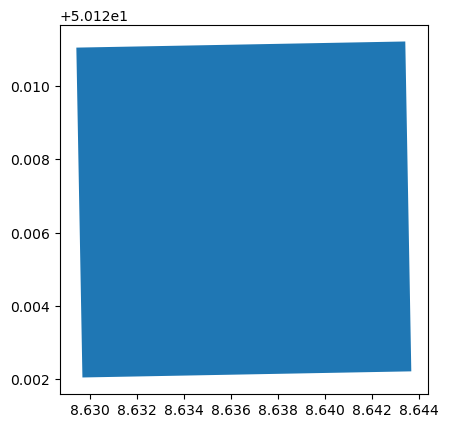

In [39]:
gdf_osm_shape_poly=gdf_osm_shape_poly.to_crs(4326)
gdf_osm_shape_poly.plot()

# get network incl. history

In [40]:
client = OhsomeClient()

time = "2017-01-01,2024-01-01"
fltr = "(highway in (primary, primary_link, secondary, secondary_link, tertiary, tertiary_link))  and( maxspeed in (30,50)) and type:way"
#fltr = "(highway in (primary, primary_link, secondary, secondary_link, tertiary, tertiary_link)) and type:way"

properties = "tags" # to retreive OSM tags along with the geometries
bpolys=gdf_osm_shape_poly#.buffer(0.0001)

response = client.elementsFullHistory.geometry.post(bpolys=bpolys, time=time, filter=fltr, properties=properties, timeout=100)

response_df = response.as_dataframe()
response_df

geometry  \
@osmId         @validFrom          @validTo                                                                 
way/1079657002 2023-08-16 14:02:33 2023-08-16 14:31:41  LINESTRING (8.64188 50.1278, 8.64264 50.12741,...   
               2023-08-16 14:31:41 2023-08-22 07:45:42  LINESTRING (8.64188 50.1278, 8.64264 50.12741,...   
               2023-08-22 07:45:42 2023-08-22 07:50:39  LINESTRING (8.64153 50.12796, 8.64271 50.12736...   
               2023-08-22 07:50:39 2023-08-22 10:17:23  LINESTRING (8.64153 50.12796, 8.64182 50.12781...   
               2023-08-22 10:17:23 2023-08-23 12:19:48  LINESTRING (8.64153 50.12796, 8.64182 50.12781...   
...                                                                                                   ...   
way/987122250  2023-09-25 11:09:46 2023-09-25 13:04:13  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-09-25 13:04:13 2023-09-25 21:45:37  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-09-25 21:45:37 2023-09-30 18:20:52  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-09-30 18:20:52 2023-10-17 20:48:23  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-10-17 20:48:23 2024-01-01 00:00:00  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   

                                                                                              @other_tags  
@osmId         @validFrom          @validTo                                                                
way/1079657002 2023-08-16 14:02:33 2023-08-16 14:31:41  {'class:bicycle': '1', 'cycleway:both': 'track...  
               2023-08-16 14:31:41 2023-08-22 07:45:42  {'class:bicycle': '1', 'cycleway:both': 'track...  
               2023-08-22 07:45:42 2023-08-22 07:50:39  {'class:bicycle': '1', 'cycleway:both': 'lane'...  
               2023-08-22 07:50:39 2023-08-22 10:17:23  {'class:bicycle': '1', 'cycleway:both': 'lane'...  
               2023-08-22 10:17:23 2023-08-23 12:19:48  {'class:bicycle': '1', 'cycleway:both': 'lane'...  
...                                                                                                   ...  
way/987122250  2023-09-25 11:09:46 2023-09-25 13:04:13  {'cycleway:right': 'lane', 'cycleway:right:bic...  
               2023-09-25 13:04:13 2023-09-25 21:45:37  {'cycleway:right': 'lane', 'cycleway:right:bic...  
               2023-09-25 21:45:37 2023-09-30 18:20:52  {'cycleway:left': 'no', 'cycleway:right': 'lan...  
               2023-09-30 18:20:52 2023-10-17 20:48:23  {'cycleway:left': 'no', 'cycleway:right': 'lan...  
               2023-10-17 20:48:23 2024-01-01 00:00:00  {'cycleway:left': 'no', 'cycleway:right': 'lan...  

[815 rows x 2 columns]

### adding tags to df

In [41]:
def addingExtraTags(df_):
    df=df_.copy()
    for ind,row in df.iterrows():        
        tags = row['@other_tags']
        # Print the keys and values
        for key, value in tags.items():
            if key=="maxspeed":
                df.at[ind, "maxspeed"] = value
            if key=="maxspeed:conditional":
                df.at[ind, "maxspeed:conditional"] = value
            if key=="highway":
                df.at[ind, "highway"] = value
            if key=="name":
                df.at[ind, "name"] = value

    return df

selected_ms=addingExtraTags(response_df)
selected_ms

geometry  \
@osmId         @validFrom          @validTo                                                                 
way/1079657002 2023-08-16 14:02:33 2023-08-16 14:31:41  LINESTRING (8.64188 50.1278, 8.64264 50.12741,...   
               2023-08-16 14:31:41 2023-08-22 07:45:42  LINESTRING (8.64188 50.1278, 8.64264 50.12741,...   
               2023-08-22 07:45:42 2023-08-22 07:50:39  LINESTRING (8.64153 50.12796, 8.64271 50.12736...   
               2023-08-22 07:50:39 2023-08-22 10:17:23  LINESTRING (8.64153 50.12796, 8.64182 50.12781...   
               2023-08-22 10:17:23 2023-08-23 12:19:48  LINESTRING (8.64153 50.12796, 8.64182 50.12781...   
...                                                                                                   ...   
way/987122250  2023-09-25 11:09:46 2023-09-25 13:04:13  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-09-25 13:04:13 2023-09-25 21:45:37  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-09-25 21:45:37 2023-09-30 18:20:52  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-09-30 18:20:52 2023-10-17 20:48:23  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   
               2023-10-17 20:48:23 2024-01-01 00:00:00  LINESTRING (8.63662 50.12343, 8.63618 50.12373...   

                                                                                              @other_tags  \
@osmId         @validFrom          @validTo                                                                 
way/1079657002 2023-08-16 14:02:33 2023-08-16 14:31:41  {'class:bicycle': '1', 'cycleway:both': 'track...   
               2023-08-16 14:31:41 2023-08-22 07:45:42  {'class:bicycle': '1', 'cycleway:both': 'track...   
               2023-08-22 07:45:42 2023-08-22 07:50:39  {'class:bicycle': '1', 'cycleway:both': 'lane'...   
               2023-08-22 07:50:39 2023-08-22 10:17:23  {'class:bicycle': '1', 'cycleway:both': 'lane'...   
               2023-08-22 10:17:23 2023-08-23 12:19:48  {'class:bicycle': '1', 'cycleway:both': 'lane'...   
...                                                                                                   ...   
way/987122250  2023-09-25 11:09:46 2023-09-25 13:04:13  {'cycleway:right': 'lane', 'cycleway:right:bic...   
               2023-09-25 13:04:13 2023-09-25 21:45:37  {'cycleway:right': 'lane', 'cycleway:right:bic...   
               2023-09-25 21:45:37 2023-09-30 18:20:52  {'cycleway:left': 'no', 'cycleway:right': 'lan...   
               2023-09-30 18:20:52 2023-10-17 20:48:23  {'cycleway:left': 'no', 'cycleway:right': 'lan...   
               2023-10-17 20:48:23 2024-01-01 00:00:00  {'cycleway:left': 'no', 'cycleway:right': 'lan...   

                                                         highway maxspeed  \
@osmId         @validFrom          @validTo                                 
way/1079657002 2023-08-16 14:02:33 2023-08-16 14:31:41  tertiary       50   
               2023-08-16 14:31:41 2023-08-22 07:45:42  tertiary       50   
               2023-08-22 07:45:42 2023-08-22 07:50:39  tertiary       50   
               2023-08-22 07:50:39 2023-08-22 10:17:23  tertiary       50   
               2023-08-22 10:17:23 2023-08-23 12:19:48  tertiary       50   
...                                                          ...      ...   
way/987122250  2023-09-25 11:09:46 2023-09-25 13:04:13  tertiary       50   
               2023-09-25 13:04:13 2023-09-25 21:45:37  tertiary       50   
               2023-09-25 21:45:37 2023-09-30 18:20:52  tertiary       50   
               2023-09-30 18:20:52 2023-10-17 20:48:23  tertiary       50   
               2023-10-17 20:48:23 2024-01-01 00:00:00  tertiary       50   

                                                                 name  
@osmId         @validFrom          @validTo                            
way/1079657002 2023-08-16 14:02:33 2023-08-16 14:31:41  Sophienstraße  
               2023-08-16 14:31:41 2023-08-

### cleanup: drop/rename columns

In [42]:
selected_ms=selected_ms.drop(columns=['@other_tags'])

selected_ms_highway=selected_ms[selected_ms.highway.isin(["primary","secondary","tertiary","primary_link","secondary_link","tertiary_link"])].copy()

selected_ms_highway=selected_ms_highway.reset_index().copy()

selected_ms_highway=selected_ms_highway.rename(columns={'@osmId':'osmId', '@validFrom':'validFrom', '@validTo':'validTo', '@other_tags':'other_tags'})

selected_ms_highway

,osmId,validFrom,validTo,geometry,highway,maxspeed,name
0,way/1079657002,2023-08-16 14:02:33,2023-08-16 14:31:41,"LINESTRING (8.64188 50.1278, 8.64264 50.12741,...",tertiary,50,Sophienstraße
1,way/1079657002,2023-08-16 14:31:41,2023-08-22 07:45:42,"LINESTRING (8.64188 50.1278, 8.64264 50.12741,...",tertiary,50,Sophienstraße
2,way/1079657002,2023-08-22 07:45:42,2023-08-22 07:50:39,"LINESTRING (8.64153 50.12796, 8.64271 50.12736...",tertiary,50,Sophienstraße
3,way/1079657002,2023-08-22 07:50:39,2023-08-22 10:17:23,"LINESTRING (8.64153 50.12796, 8.64182 50.12781...",tertiary,50,Sophienstraße
4,way/1079657002,2023-08-22 10:17:23,2023-08-23 12:19:48,"LINESTRING (8.64153 50.12796, 8.64182 50.12781...",tertiary,50,Sophienstraße
...,...,...,...,...,...,...,...
810,way/987122250,2023-09-25 11:09:46,2023-09-25 13:04:13,"LINESTRING (8.63662 50.12343, 8.63618 50.12373...",tertiary,50,Schloßstraße
811,way/987122250,2023-09-25 13:04:13,2023-09-25 21:45:37,"LINESTRING (8.63662 50.12343, 8.63618 50.12373...",tertiary,50,Schloßstraße
812,way/987122250,2023-09-25 21:45:37,2023-09-30 18:20:52,"LINESTRING (8.63662 50.12343, 8.63618 50.12373...",tertiary,50,Schloßstraße
813,way/987122250,2023-09-30 18:20:52,2023-10-17 20:48:23,"LINESTRING (8.63662 50.12343, 8.63618 50.12373...",tertiary,50,Schloßstraße


### rechne die Netzlänge zum Jahresanfang

In [43]:

# Convert validFrom and validTo to datetime
osm_data = selected_ms_highway.copy()  # Replace with your actual GeoDataFrame
osm_data["validFrom"] = pd.to_datetime(osm_data["validFrom"])
osm_data["validTo"] = pd.to_datetime(osm_data["validTo"])

# Ensure CRS is metric (projected CRS for length calculation)
if osm_data.crs is None or osm_data.crs.is_geographic:
    osm_data = osm_data.to_crs(epsg=25832)  # UTM CRS for Germany

# Define the years to check (from the dataset's min-max year)
years = list(range(osm_data["validFrom"].dt.year.min(), osm_data["validTo"].dt.year.max() + 1))

# Function to extract the valid road state on January 1st of each year
def get_state_on_date(df, target_date):
    """
    Returns the state of the road network on a given target date (e.g., January 1st of each year).
    """
    return df[(df["validFrom"] <= target_date) & (df["validTo"] >= target_date)]  # ✅ FIXED CONDITION

# Store results
yearly_lengths = []

# Iterate through each year
for year in years:
    date = pd.Timestamp(f"{year}-01-01")
    filtered_df = get_state_on_date(osm_data, date)

    if not filtered_df.empty:
        # Compute line lengths
        filtered_df = filtered_df.copy()  # Ensure it's a fresh copy to avoid warnings
        filtered_df.loc[:, "length"] = filtered_df.geometry.length
        
        # Aggregate lengths by maxspeed
        summary = filtered_df.groupby("maxspeed")["length"].sum().reset_index()
        summary["year"] = year
        yearly_lengths.append(summary)

# Combine results into a single DataFrame
df_lengths = pd.concat(yearly_lengths, ignore_index=True)

# Convert length to kilometers
df_lengths["length_km"] = df_lengths["length"] / 1000

# Pivot for better readability (Year as index, maxspeed as columns)
df_lengths_pivot = df_lengths.pivot(index="year", columns="maxspeed", values="length_km").fillna(0)


df_lengths_pivot.reset_index()

maxspeed,year,30,50
0,2017,0.881983,2.239853
1,2018,0.881983,2.244190
2,2019,0.881983,2.244190
3,2020,0.884283,2.234905
4,2021,1.428569,1.685862
5,2022,1.428569,1.686172
6,2023,1.426949,1.678598
7,2024,1.368816,1.925523


In [44]:

# ✅ Given DataFrame
data = df_lengths_pivot.reset_index()

# ✅ Convert all values to **kilometers**
for col in data.columns[1:]:  # Skipping 'year' column
    data[col] = data[col]  # Ensure values are correctly in km

# ✅ Compute **Total Length** (sum of all maxspeeds, in km)
data["Total Length"] = data.drop(columns=["year"]).sum(axis=1)

# ✅ Convert DataFrame from wide to long format for Altair
data_long = data.melt(id_vars=["year"], var_name="maxspeed", value_name="length")

# ✅ Define color mapping: "Total Length" in gray, others with color scheme
color_scale = alt.Scale(
    domain=["30", "50", "Total Length"],  # Explicitly define all categories
    range=["green", "orange", "gray"]  # Blue (30), Orange (50), Gray (Total Length)
)

# ✅ **📌 Create Line Plot**
line_chart = alt.Chart(data_long).mark_line(point=True).encode(
    x=alt.X("year:O", title="Jahr"),  # Ordinal ensures all years appear
    y=alt.Y("length:Q", title="Länge (km)"),  # Quantitative scale in km
    color=alt.Color("maxspeed:N", title="Maxspeed", scale=color_scale),  # Color encoding
    tooltip=["year:O", "maxspeed:N", alt.Tooltip("length:Q", format=".2f", title="Length (km)")]
).properties(
    title="Straßenlängen nach zul. Geschwindigkeit (maxspeed)",
    width=600,
    height=400
)

# ✅ Display chart
road_length_plot = line_chart
road_length_plot


alt.Chart(...)

<Axes: >

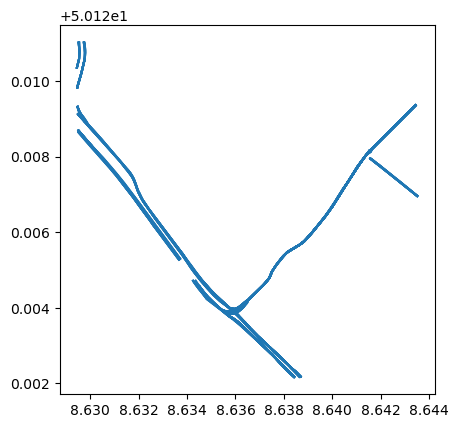

In [45]:
selected_ms_highway.plot()

### get accidents along the relevant roads 

In [46]:
# relevant roads
osm_roads_all_buffer=selected_ms_highway.copy()
osm_roads_all_buffer=osm_roads_all_buffer.to_crs(25832)
osm_roads_all_buffer["geometry"]=osm_roads_all_buffer.buffer(10)

In [47]:
accidents = gpd.read_file(r"accident_data/accidents_germany_2017-2023_si.gpkg",
                      mask=gdf_osm_shape_poly)
accidents

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,USTRZUSTAND,IstGkfz,OID_,PLST,geometry
0,16039.0,6,4,12,0,2019,7,14,1,3,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (8.63048 50.12847)
1,13162.0,6,4,12,0,2019,5,14,4,2,...,0,0,1,0,0,1,0.0,NaN,NaN,POINT (8.6397 50.12639)
2,12260.0,6,4,12,0,2019,3,12,7,3,...,1,0,1,0,0,0,0.0,NaN,NaN,POINT (8.64044 50.12712)
3,140631.0,6,4,12,0,2017,3,10,5,3,...,1,0,0,0,0,1,NaN,NaN,NaN,POINT (8.641 50.12281)
4,26887.0,6,4,12,0,2017,1,18,4,2,...,1,1,0,0,2,1,NaN,NaN,NaN,POINT (8.64124 50.12788)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,6,4,12,0,2023,7,18,5,3,...,1,0,0,0,0,1,0.0,69050.0,1.0,POINT (8.63051 50.12845)
60,185455.0,6,4,12,0,2022,2,11,5,2,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (8.64143 50.12803)
61,188739.0,6,4,12,0,2022,7,14,4,3,...,0,0,1,1,0,0,0.0,NaN,NaN,POINT (8.64266 50.12357)
62,190091.0,6,4,12,0,2022,10,13,7,3,...,1,0,0,0,0,0,0.0,NaN,NaN,POINT (8.64287 50.12877)


In [48]:
accidents_25832=accidents.to_crs(25832)
accidents_clipped = accidents_25832.clip(osm_roads_all_buffer)
accidents_clipped

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,USTRZUSTAND,IstGkfz,OID_,PLST,geometry
57,54261.0,6,4,12,0,2020,10,9,6,3,...,1,1,0,0,0,0,0.0,NaN,NaN,POINT (474121.888 5552308.953)
55,47280.0,6,4,12,0,2020,2,19,4,3,...,0,0,0,1,2,1,0.0,NaN,NaN,POINT (474080.183 5552350.193)
40,NaN,6,4,12,0,2023,11,15,2,3,...,1,0,0,0,0,0,0.0,72523.0,1.0,POINT (474071.03 5552373.97)
39,NaN,6,4,12,0,2023,7,13,3,3,...,1,0,0,0,0,1,0.0,69125.0,1.0,POINT (474026.791 5552417.78)
25,NaN,6,4,12,0,2023,1,15,4,3,...,0,0,0,1,0,0,0.0,61531.0,1.0,POINT (473964.44 5552453.25)
27,62893.0,6,4,12,0,2022,7,12,7,3,...,1,0,1,0,0,0,0.0,NaN,NaN,POINT (473984.23 5552459.841)
41,NaN,6,4,12,0,2023,8,7,4,3,...,1,0,0,0,0,0,0.0,72618.0,1.0,POINT (473979.236 5552464.776)
28,68545.0,6,4,12,0,2022,8,17,3,2,...,1,0,1,0,0,0,0.0,NaN,NaN,POINT (473978.664 5552465.341)
23,NaN,6,4,12,0,2021,5,11,5,3,...,1,0,0,0,0,0,0.0,54951.0,NaN,POINT (474136.337 5552309.222)
34,NaN,6,4,12,0,2021,9,11,7,3,...,1,0,0,0,0,0,0.0,173103.0,NaN,POINT (474132.7 5552638.93)


In [49]:
### someday i could also flad instead of clip

#import geopandas as gpd
#
## Ensure both GeoDataFrames are in the same CRS
#accidents_25832 = accidents_25832.to_crs(25832)
#osm_roads_all_buffer = osm_roads_all_buffer.to_crs(25832)
#
## **🚀 Spatial Join to Check Containment**
#accidents_flagged = accidents_25832.sjoin(osm_roads_all_buffer, how="left", predicate="within")
#
## **🚀 Add "hvs" Flag**
#accidents_flagged["hvs"] = accidents_flagged["index_right"].notna().map({True: "yes", False: "no"})
#
## **🚀 Drop unnecessary join columns**
#accidents_flagged = accidents_flagged.drop(columns=["index_right"])
#
## ✅ Show Result
#accidents_flagged.head()
#

In [50]:
accidents_clipped=accidents_clipped.to_crs(4326).copy()

In [51]:
### accidents bar plot

# Example DataFrame (Replace with your actual data)
data = accidents_clipped[["UJAHR","UKATEGORIE"]]


# Aggregate data: Count accidents per year and category
df_agg = data.groupby(["UJAHR", "UKATEGORIE"]).size().reset_index(name="count")

# Define the full range of years from 2017 to 2024
years = list(range(2017, 2025))

# Ensure all years are included (fill missing ones with 0)
df_full = pd.DataFrame([(year, category) for year in years for category in df_agg["UKATEGORIE"].unique()], columns=["UJAHR", "UKATEGORIE"])
df_agg = df_full.merge(df_agg, on=["UJAHR", "UKATEGORIE"], how="left").fillna(0)

# Stacked Bar Chart
bar_chart = alt.Chart(df_agg).mark_bar().encode(
    x=alt.X("UJAHR:O", title="Jahr", scale=alt.Scale(domain=years)),
    y=alt.Y("count:Q", title="Anzahl Unfälle",axis=alt.Axis(tickMinStep=1)),
    #color=alt.Color("UKATEGORIE:N", title="Unfallkategorie", scale=alt.Scale(scheme="set1")),
    color=alt.Color("UKATEGORIE:N",  # ✅ Ensure maxspeed is categorical (Nominal)
        title="Unfallkategorie",
        scale=alt.Scale(
            domain=[1, 2, 3],  
            range=["darkred", "red", "pink"]  
        ),
    ),
    tooltip=["UJAHR", "UKATEGORIE", "count"]
).properties(
    title="Unfälle pro Jahr und Unfallkategorie",
    width=300,
    height=150
)

# 📌 Add "No Data" Text for 2024
text_annotation = alt.Chart(pd.DataFrame({"UJAHR": [2024], "count": [df_agg["count"].max() * 0.05]})).mark_text(
    text="No Data", 
    #dy=-10,  # Adjust vertical position
    dx=20,
    size=11, 
    color="black",
    fontWeight="bold",
    angle=270
).encode(
    x=alt.X("UJAHR:O"),  
    y=alt.Y("count:Q")  # Position at half the max value
)

# 📌 Add "No Data" Text for 2017 wenn Berlin, TODO This needs to be automised based on the ags of the Kachel
text_annotation2 = alt.Chart(pd.DataFrame({"UJAHR": [2017], "count": [df_agg["count"].max() * 0.05]})).mark_text(
    text="No Data", 
    #dy=-10,  # Adjust vertical position
    dx=20,
    size=11, 
    color="black",
    fontWeight="bold",
    angle=270
).encode(
    x=alt.X("UJAHR:O"),  
    y=alt.Y("count:Q")  # Position at half the max value
)

if berlin=="yes":
    bar_chart = bar_chart + text_annotation + text_annotation2
else:
    bar_chart = bar_chart + text_annotation

bar_chart



alt.LayerChart(...)

In [52]:
# ### accidents map plot



# df_acc = accidents_clipped
# df_acc['x']=df_acc.geometry.x
# df_acc['y']=df_acc.geometry.y

# # ✅ accidnets Layer
# points = alt.Chart(df_acc).mark_circle(opacity=0.8).encode(
#     longitude="x:Q",
#     latitude="y:Q",
#     #size=alt.Size("size:Q", scale=alt.Scale(range=[10, 300]), legend=None),  # Dynamic point size
#     color=alt.Color("UKATEGORIE:N", title="Category", scale=alt.Scale(scheme="set1")),
#     tooltip=[ "UKATEGORIE:N", "size:Q"]
# ).project(
#     type="mercator"
# )

# til_geo = alt.layer(til.create_tiles_chart(width=500, height=500, provider=til.providers.CartoDB.Positron), points).project(type="mercator").properties(width=500, height=500)
# til_geo



In [53]:
#alt.data_transformers.disable_max_rows()

# concated viz (dashboardish)

In [54]:
#alt.renderers.enable('mimetype') 

#alt.renderers.enable("notebook") 

#alt.renderers.enable("html") 

#### kachel_infobox

In [55]:
# this is pretty ugly, but it works so far

kachel_infobox=gdf_osm_shape_poly.copy()

kachel_infobox.unfall_ratio=kachel_infobox.unfall_ratio.round(2)*100
kachel_infobox.diff_ratio_tempo30=kachel_infobox.diff_ratio_tempo30.round(2)*100

kachel_infobox.unfall_ratio=kachel_infobox.unfall_ratio.astype(int).astype(str) + " %"
kachel_infobox.diff_ratio_tempo30=kachel_infobox.diff_ratio_tempo30.astype(int).astype(str) + " Prozentpunkte"

df_transposed = kachel_infobox.reset_index().T

df_transposed_clean=df_transposed.reset_index().rename(columns= {"index": 'names',0: 'values' }).copy()

df_transposed_clean=df_transposed_clean[df_transposed_clean.names.isin(["id","diff_ratio_tempo30","unfall_ratio"])]


df_transposed_clean.names=df_transposed_clean.names.replace("diff_ratio_tempo30","Änderung Verhältnis Tempo50/30")
df_transposed_clean.names=df_transposed_clean.names.replace("unfall_ratio","Änderung Unfälle (18&19 vs 22&23)")


data=df_transposed_clean

# Base chart properties
base = alt.Chart(data).encode(
    y=alt.Y("names:N", title=None, axis=None)  # Align rows
)

# Bold text for names
names_chart = base.mark_text(
    align="left",
    baseline="middle",
    fontSize=14,
    fontWeight="bold"
).encode(
    x=alt.value(10),  # Left align text
    text="names:N"
)

# Regular text for values
values_chart = base.mark_text(
    align="left",
    baseline="middle",
    fontSize=14
).encode(
    x=alt.value(255),  # Adjust position for second column
    text="values:N"
)

# Background box to create a visible border
border = alt.Chart(pd.DataFrame({"dummy": [""]})).mark_rect(
    stroke="black",  # Border color
    strokeWidth=2,   # Border thickness
    fill=None        # Transparent background
).encode(
    x=alt.value(0),
    x2=alt.value(400),
    y=alt.value(0),
    y2=alt.value(100)
)

# Combine text with the border
infobox = (border + names_chart + values_chart).properties(
    width=400,
    height=100,
    title="Infobox Kachel"
)

infobox

alt.LayerChart(...)

In [56]:
alt.renderers.enable('html')

RendererRegistry.enable('html')

In [57]:
import pandas as pd
import altair as alt
from datetime import datetime


# Beispiel-Daten laden
#data = selected_ms_highway[:5000].copy()
data = selected_ms_highway.copy()


Kachel_id=gdf_osm_shape_poly.reset_index()['id_left'][0]

#chart_title = alt.TitleParams(
#    ["Änderungen der zul. Geschwindigkeit (OSM, maxspeed) im zeitlicher Verlauf","für Kachel "+Kachel_id],
#    subtitle=["", "© OpenStreetMap contributors powered by ohsome API","created by FG Radverkehr - TH Wildau"],
#)


# Konvertiere die Zeitspalten in datetime-Objekte
data['validFrom'] = pd.to_datetime(data['validFrom'])
data['validTo'] = pd.to_datetime(data['validTo'])

min_time_dt = data['validFrom'].min()
max_time_dt = data['validTo'].max()

# Konvertiere die Zeitspalten in Unix-Timestamps (numerisch)
data['validFrom_ts'] = data['validFrom'].apply(lambda x: x.timestamp())
data['validTo_ts'] = data['validTo'].apply(lambda x: x.timestamp())

# Definiere den Zeitbereich für den Slider
min_time = data['validFrom_ts'].min()
max_time = data['validTo_ts'].max()

# Slider zur Auswahl eines Zeitpunkts
time_range = alt.binding_range(min=min_time, max=max_time, step=3600, name='Time') #, width=300

# Auswahl basierend auf dem Slider
time_selection = alt.param(value=min_time, bind=time_range)

# Funktion zur Formatierung des Timestamps in ein lesbares Datum
def format_timestamp(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')



##### TIME #####

set_dy=270
set_dx=-200

# Textanzeige des ausgewählten Jahres, Monats und Tages
year_display = alt.Chart(pd.DataFrame({'dummy': [0]})).mark_text(
    align='left',
    dx=set_dx-50,
    dy=set_dy,
    fontSize=18,
    fontWeight="bold"
).transform_calculate(
    # Berechnung des Jahres aus dem Slider-Wert (time_selection)
    selected_year="year(datetime({0} * 1000))".format(time_selection.name)
).encode(
    text='selected_year:N'  # Zeigt das ausgewählte Jahr an
)

# Textanzeige des ausgewählten Jahres, Monats und Tages
month_display = alt.Chart(pd.DataFrame({'dummy': [0]})).mark_text(
    align='left',
    dx=set_dx,
    dy=set_dy,
    fontSize=18
).transform_calculate(
    # Berechnung des Jahres aus dem Slider-Wert (time_selection)
    selected_month="month(datetime({0} * 1000))+1".format(time_selection.name)
).encode(
    text='selected_month:N'  # Zeigt das ausgewählte Jahr an
)


way_selection = alt.selection_point(fields=['osmId'], on='click', empty='none')

#### WAY ####
sel_chart = alt.Chart(data).mark_line(dy=-100).encode(
    x=alt.X('validFrom:T',
            scale=alt.Scale(domain=[min_time_dt, max_time_dt])),
    x2=alt.X2('validTo:T'),
    y=alt.Y('maxspeed:O', 
            scale=alt.Scale(domain=data.maxspeed.unique())),
    #color=alt.Color("@osmId:N",legend=None),
).transform_filter(
    way_selection
)

#data_woDub=data.drop_duplicates(subset=['osmId'])[['osmId']]
data_woDub = data.drop_duplicates(subset=['osmId'])[['osmId']].drop_duplicates()
base_url = "https://osmlab.github.io/osm-deep-history/#/way/"
 #Dynamic text (title) with hyperlink based on the selected region
dynamic_title = alt.Chart(data_woDub).mark_text(
    align='center',  # Center the title
    fontSize=20,  # Font size for the title
    dx=60,
    dy=0,# Adjust vertical position of the title
    color="darkblue"
).transform_calculate(
    url="'https://osmlab.github.io/osm-deep-history/#/' + datum.osmId"  # Concatenate base URL and the selected 'id' field
).encode(
    text=alt.condition(
        way_selection, 'osmId:N', alt.value('')
    ),
    href=alt.condition(
        way_selection,
        'url:N',  # Reference the dynamically created URL
        alt.value('')  # Empty value when nothing is selected
    )

).add_params(
    way_selection
)


static_title = alt.Chart(pd.DataFrame({'text': ["Ausgewählter OSM Way:"]})).mark_text(
    align="center",
    fontSize=15,
    dx=50,
    dy=-25
).encode(
    text=alt.value("Ausgewählter OSM Way:")
)

dynamic_title = static_title + dynamic_title

##### GEO #####
# Poly Umriss
gdf_osm_shape_poly_utm=gdf_osm_shape_poly.to_crs(25832)
gdf_osm_shape_poly_b_utm=gdf_osm_shape_poly_utm.buffer(0.0001)
gdf_osm_shape_poly_b=gdf_osm_shape_poly_b_utm.to_crs(4326)


#gdf_osm_shape_poly_b=gdf_osm_shape_poly_b.to_crs(3857)
geoshape_base=alt.Chart(gdf_osm_shape_poly_b).mark_geoshape(opacity=0.08)

gdf_osm_shape_poly_b_utm=gdf_osm_shape_poly_utm.buffer(50)
gdf_osm_shape_poly_b=gdf_osm_shape_poly_b_utm.to_crs(4326)
geoshape_base_hidden=alt.Chart(gdf_osm_shape_poly_b).mark_geoshape(opacity=0.00)
#data=data.to_crs(3857)


# Linien visualisieren
geoshape_chart = alt.Chart(data).mark_geoshape(fillOpacity=0, 
                   #stroke="green",
                   strokeWidth=2,).encode(
    stroke=alt.Color("maxspeed:N",  # ✅ Ensure maxspeed is categorical (Nominal)
        title="Maxspeed",
        scale=alt.Scale(
            domain=["30", "50"],  # ✅ Explicit categories
            range=["green", "orange"]  # ✅ Custom colors
        ),
        #legend=alt.Legend(
        #    orient="left",  # ✅ Position legend to the left
        #    symbolType="stroke",  # ✅ Force filled square legend symbols
        #    symbolStrokeWidth=2  # ✅ Keeps stroke width for consistency
        #)
        legend=None
    ),

    #color=alt.Color('osmId:N', legend=alt.Legend(orient='right', offset=-150))
      # Einfärbung nach maxspeed
    tooltip=[
        alt.Tooltip('osmId:N', title="osmId"),
        alt.Tooltip('validFrom:T', title="Valid From"),
        alt.Tooltip('validTo:T', title="Valid To"),
        alt.Tooltip('maxspeed:Q', title="Maxspeed"),
        alt.Tooltip('highway:N', title="Highway"),
        alt.Tooltip('name:N', title="Name")
    ]
).transform_filter(
    # Filter basierend auf dem ausgewählten Zeitintervall
    (alt.datum['validFrom_ts'] <= time_selection) &
    (alt.datum['validTo_ts'] >= time_selection)
).add_params(
    way_selection
).project(
    type='mercator'  # Mercator-Projektion für Geo-Daten
)


# ✅ **Accident Points Layer (Filtered by Year)**
df_acc = accidents_clipped
df_acc['x'] = df_acc.geometry.x
df_acc['y'] = df_acc.geometry.y

points = alt.Chart(df_acc).mark_circle(size=100, opacity=0.95).encode(
    longitude="x:Q",
    latitude="y:Q",
    #color=alt.Color("UKATEGORIE:N", title="Category", scale=alt.Scale(scheme="set1"), 
    color=alt.Color("UKATEGORIE:N",  # ✅ Ensure maxspeed is categorical (Nominal)
        title="Unfallkategorie",
        scale=alt.Scale(
            domain=[1, 2, 3],  
            range=["darkred", "red", "pink"]  
        ),
    #legend=alt.Legend(orient="left")
    legend=None
),
    tooltip=["UJAHR", "UKATEGORIE"]
).transform_filter(
    f"datum.UJAHR == year(datetime({time_selection.name} * 1000))"  # ✅ Correct year filtering
).project(type="mercator")



# BASEMAP
#til_geo=til.add_tiles(geoshape_base, provider=til.providers.CartoDB.Positron)#.properties(width=600, height=400)
## Unfortunatly concatenation ist not yet supportet in altair tiles, therefore i will leave this for now
# https://github.com/vega/altair_tiles/issues/33

# Render das Chart
geo_chart = geoshape_base_hidden + geoshape_base + geoshape_chart +points+ year_display +month_display 
geo_chart = geo_chart.add_params(
    time_selection
)


# geo
geo_chart=geo_chart.properties(width=600, height=600)#.configure_legend(direction="vertical")

#geo_chart=geo_chart.


### Kontext
road_length_plot =road_length_plot.properties(width=300, height=150)
bar_chart=bar_chart.properties(width=300, height=150)
road_and_bar_chart = alt.vconcat(road_length_plot, bar_chart, spacing=10).resolve_scale(
    color="independent"
)

## way_select_chart
way_select_chart=dynamic_title & sel_chart

spacer = alt.Chart(pd.DataFrame({'dummy': [0]})).mark_text().properties(height=30)
#chart | sel_chart + dynamic_title

til_geo = alt.layer(til.create_tiles_chart(width=500, height=500, provider=til.providers.CartoDB.Positron), geo_chart).project(type="mercator").properties(width=500, height=500)


#full_chrt=(geo_chart | way_select_chart & road_and_bar_chart ).resolve_scale(
full_chrt=(infobox & til_geo  | alt.vconcat(way_select_chart,spacer, road_and_bar_chart) ).resolve_scale(
    color='independent' 
).resolve_legend(
    color='independent' 
)

#full_chrt

#chart_title = alt.TitleParams(
#    ["Änderungen der zul. Geschwindigkeit (OSM, maxspeed) im zeitlicher Verlauf","für Kachel "+Kachel_id],
#    subtitle=["", "© OpenStreetMap contributors powered by ohsome API","created by FG Radverkehr - TH Wildau"],
#)

##############################################################
# adding Titel and Subtitle
title = alt.Chart(
    {"values": [{"text": "Zul. Geschwindigkeit und Unfälle"}]}
).mark_text(size=18, align='left', lineBreak='\n').encode(  #,anchor='start' , align='left'
    text="text:N",
    #x=alt.value(0)
)
subtitle = alt.Chart(
    {"values": [{"text": "Änderungen der zul. Geschwindigkeit (OSM, maxspeed) und Unfälle mit Personenschaden im zeitlicher Verlauf für eine ausgewählte 1km-Kachel"}]}
).mark_text(size=12, align='left').encode(  #,anchor='start' , align='left'
    text="text:N",
    #x=alt.value(0)
)



quelle = alt.Chart(
    {"values": [{"text": "Quellen: \n" 
                 "- OpenStreetMap contributors \n" 
                 "- ohsome API, doi:10.5281/zenodo.4146990 \n" 
                 "- osm-deep-history, https://osmlab.github.io/osm-deep-history/ \n"
                 "- Unfallatlas der Statistischen Ämter des Bundes und der Länder, dl-de/by-2-0 \n"
                 "- Zensus2022_1kmGitter © GeoBasis-DE / BKG (2024), dl-de/by-2-0 \n" 
                 "______\n"
                 "Erstellung TH Wildau - FG Radverkehr" 
                 }]},
).mark_text(size=11, align='left', lineBreak='\n').encode(
    text="text:N",
    x=alt.value(550),
)


#quelle2 = alt.Chart(
#    {"values": [{"text": "     Erstellung TH Wildau - FG Radverkehr"}]}
#).mark_text(
#    size=11, 
#    align='left', 
#    lineBreak='\n'
#).encode(
#    text="text:N",
#    x=alt.value(600),
#    #href=alt.value('https://www.th-wildau.de/studieren-weiterbilden/studiengaenge/radverkehr-m-eng/labor-radverkehr')  # Move href inside encode
#')




  
fullchart_title= alt.vconcat(
    title,
    subtitle,
    full_chrt,
    #quelle1 & quelle2
    quelle

).configure_view(
    stroke=None
)

fullchart_title




alt.VConcatChart(...)

In [58]:
#fullchart_title.save("output/")
fullchart_title.save("output/"+Kachel_id+"_2022_raster_map_charts_new.html")